In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [83]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])

# print mean_01
# print cov_01

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print dist_01.shape, dist_02.shape

(500, 2) (500, 2)


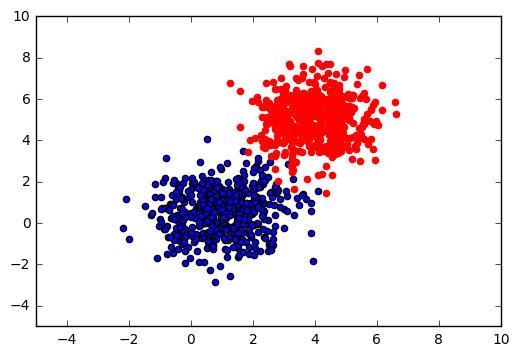

In [87]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='red')
plt.show()

In [97]:
r = dist_01.shape[0] + dist_02.shape[0]
c = dist_01.shape[1] + 1
data = np.zeros((r, c))
print data.shape

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0

print data.mean(axis=0)

(1000, 3)
[ 2.50196382  2.79504231  0.5       ]


In [99]:
np.random.shuffle(data)
print data[:10]

[[ 2.71654069  5.52237171  1.        ]
 [ 4.85577377  5.94483842  1.        ]
 [ 5.5702852   4.80342798  1.        ]
 [ 1.22679562  0.77547291  0.        ]
 [ 0.04920584 -0.60818395  0.        ]
 [ 4.787046    6.46739277  1.        ]
 [ 4.50043285  6.32474648  1.        ]
 [ 2.16896438 -0.43364051  0.        ]
 [ 2.65119008  5.43352727  1.        ]
 [-0.77863484 -0.16185446  0.        ]]


In [129]:
def distance(x1, x2):
    d = np.sqrt(((x1-x2)**2).sum())
    return d

def knn(X_train, y_train, xt, k=7):
    vals = []
    for ix in range(X_train.shape[0]):
        d = distance(X_train[ix], xt)
        vals.append([d, y_train[ix]])
    sorted_labels = sorted(vals, key=lambda z: z[0])
    neighbours = np.asarray(sorted_labels)[:k, -1]
    
    freq = np.unique(neighbours, return_counts=True)
    
    return freq[0][freq[1].argmax()]

In [120]:
test_point = np.array([8, -4])

print knn(data[:, :2], data[:, -1], test_point)

0


In [122]:
split = int(0.75 * data.shape[0])
# print split
train_data_X = data[:split, :2]
train_data_y = data[:split, -1]
test_data_X = data[split:, :2]
test_data_y = data[split:, -1]

print train_data_X.shape, train_data_y.shape
print test_data_X.shape, test_data_y.shape

(750, 2) (750,)
(250, 2) (250,)


In [130]:
preds = []

for ix in range(test_data_X.shape[0]):
    preds.append(knn(train_data_X, train_data_y, test_data_X[ix]))
preds = np.asarray(preds)

print preds.shape

(250,)


In [131]:
100*float((test_data_y == preds).sum())/preds.shape[0]

99.6